lets start our analysis by remembering the relationship between the present value of an investment, and its discount rate (i.e. non linear decline)

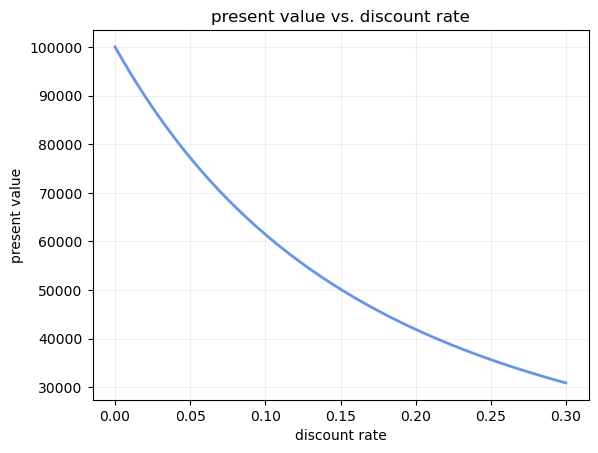

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
years = 10
cash_flow = 10000  # constant cash flow per year
rates = np.linspace(0.00, 0.30, 100)  # discount rate from 1% to 20%

# Compute present values
pv_values = [sum([cash_flow / ((1 + rate) ** t) for t in range(1, years + 1)]) for rate in rates]

# Plotting
plt.plot(rates, pv_values, color='cornflowerblue', lw=2)
plt.grid(True, alpha=0.2)
plt.xlabel('discount rate')
plt.ylabel('present value')
plt.title('present value vs. discount rate')
plt.show()

Now let's look at an investment project, $\mathcal{S}$, that gives a payoff, $\Pi=10$, in each period $t_i, i=1, \ldots,5$, whereafter it drops to $\Pi=5$ for $t=i, i=5, \ldots 10$. Initally we incur costs, $c=100$.

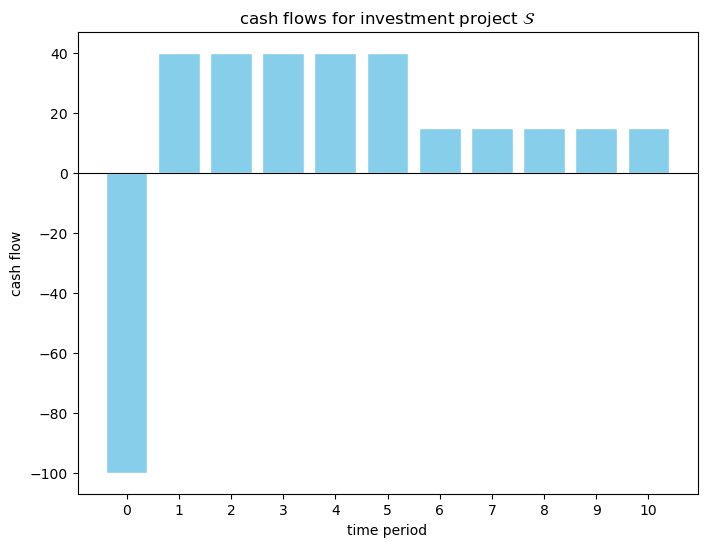

In [21]:
# Define time periods and cash flows
time_periods = list(range(0, 11))  # Period 0 to 10
cash_flows = [-100] + [40] * 5 +  [15] * 5    # -100 at time 0, then +10 for periods 1 to 10

# Create a bar chart for the cash flows
plt.figure(figsize=(8, 6))
plt.bar(time_periods, cash_flows, color='skyblue', edgecolor='white')
plt.xlabel('time period')
plt.ylabel('cash flow')
plt.title('cash flows for investment project $\\mathcal{S}$')
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(time_periods)
plt.show()

the present value is not hard to find. We can start by summing all cashflows; $\mathcal{S}_{\text{total}}=-100+40 \cdot 5 + 15 \cdot 5 = 175$. Think about what this number represents? Is it the profit of the project? 

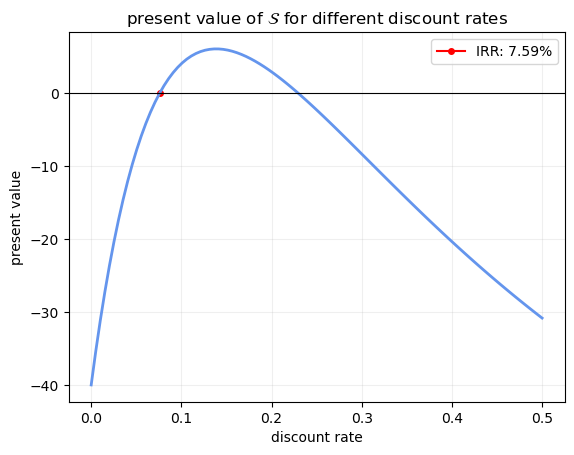

Equivalent Annual Annuity: -1.03


In [ ]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

# Parameters
years = 10
cash_flow = [-100] + [40] * 5 + [15] * 5 
rates = np.linspace(0.00, 0.50, 100)
rates2 = 0.05  # for EEA

# Compute present values for each rate for the curve (not used for annuity)
pv_values_curve = [cash_flow[0] + sum(cash_flow[t] / ((1 + rate) ** t) for t in range(1, years + 1)) for rate in rates]

# Compute a single present value at rates2 for annuity calculation
pv_value = cash_flow[0] + sum(cash_flow[t] / ((1 + rates2) ** t) for t in range(1, years + 1))

irr_value = npf.irr(cash_flow)

# Plot the IRR point
plt.plot(irr_value, 0, marker='o', markersize=4, color='red', label=f'IRR: {irr_value:.2%}')
plt.legend()

# Plotting the NPV curve using the full list for rates
plt.plot(rates, pv_values_curve, color='cornflowerblue', lw=2)
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(True, alpha=0.2)
plt.xlabel('discount rate')
plt.ylabel('present value')
plt.title('present value of $\\mathcal{S}$ for different discount rates')
plt.show()

def annuity_value(pv, rate, years):
    if rate == 0:
        return pv / years
    return pv * (rate / (1 - (1/(1+rate)**years)))

annual_equivalent = annuity_value(pv_value, rates2, years)
print(f"Equivalent Annual Annuity: {annual_equivalent:.2f}")